In [51]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

from jupyterworkflow.data import get_fremont_data

# Get data 

In [2]:
data = get_fremont_data()

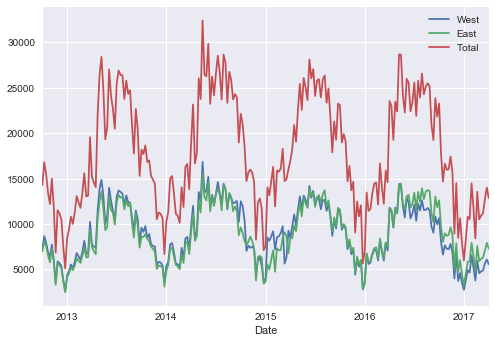

In [3]:
data.resample("W").sum().plot()

In [4]:
pivoted = data.pivot_table('Total',index=data.index.time,columns=data.index.date)

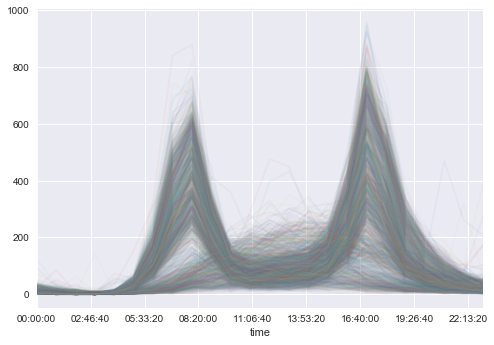

In [5]:
pivoted.plot(legend=False,alpha=0.05)

In [11]:
pivoted.T.shape

(1641, 24)

# Principal component analysis

In [17]:
x = pivoted.fillna(0).T.values
x.shape

(1641, 24)

In [20]:
x2 = PCA(2,svd_solver='full').fit_transform(x)

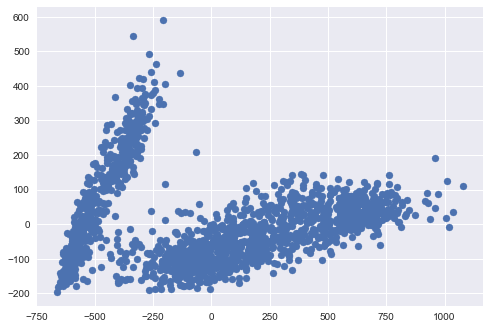

In [28]:
plt.scatter(x2[:,0],x2[:,1])


In [31]:
gmm = GaussianMixture(2)
gmm.fit(x)
labels = gmm.predict(x)
labels

array([1, 1, 1, ..., 1, 1, 1])

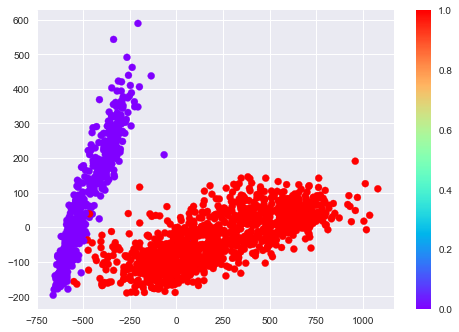

In [34]:
plt.scatter(x2[:,0],x2[:,1],c=labels,cmap='rainbow')
plt.colorbar()

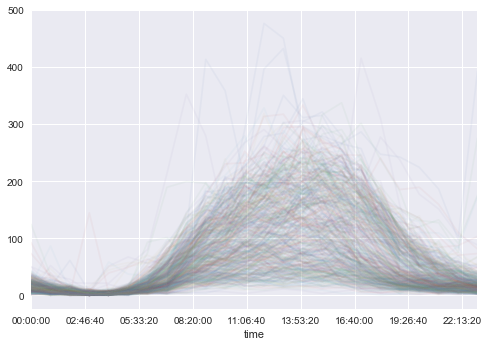

In [36]:
pivoted.T[labels == 0].T.plot(legend=False,alpha=0.05)

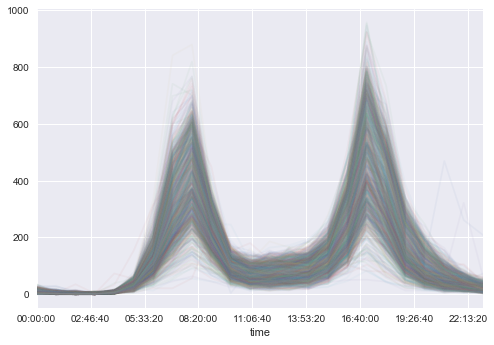

In [37]:
pivoted.T[labels == 1].T.plot(legend=False,alpha=0.05)

In [41]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

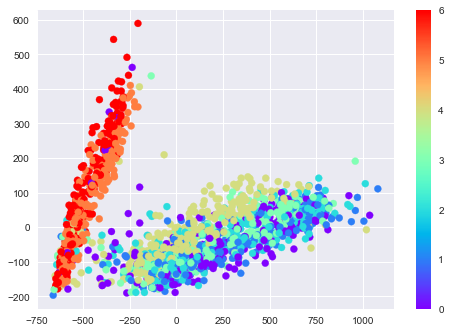

In [42]:
plt.scatter(x2[:,0],x2[:,1],c=dayofweek,cmap='rainbow')
plt.colorbar()

In [49]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 0) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06'],
              dtype='datetime64[ns]', freq=None)